#### Setup

In [12]:
from qiskit_transpiler import get_pm
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits
from qiskit import QuantumCircuit

In [13]:
#Setting the IBM provider
api_file = "../../../ibm_API_key"
with open(api_file, "r") as f:
        api_key = f.readline().strip()
provider = IBMProvider(api_key, instance='ibm-q-ncsu/nc-state/quantum-compiler')
backend = provider.get_backend('ibm_brisbane')

#### Circuit to only pass as a gate

In [14]:
gate_circuit = QuantumCircuit(1, name='custom_rx')
gate_circuit.rx(np.pi/2,0)
custom_rx = gate_circuit.to_gate()

#### Circuit to pass for getting the calibration specific to the qubit

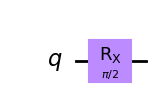

In [15]:
calibration_circuit = QuantumCircuit(1)
calibration_circuit.rx(np.pi/2,0)
calibration_circuit.draw('mpl')

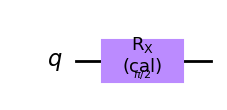

In [16]:
pm = get_pm(backend)
calibrated_circuit = pm.run(calibration_circuit)
calibrated_circuit.draw('mpl')

In [17]:
calibrated_circuit.calibrations

{'rx': {((0,),
   (1.5707963267948966,)): ScheduleBlock(Play(Drag(duration=120, sigma=30, beta=0.047326544556785144, amp=0.09968006037764007, angle=0), DriveChannel(0)), name="rx(1.571)", transform=AlignLeft())}}

In [18]:
calibration = list(calibrated_circuit.calibrations['rx'].values())[0]

In [19]:
backend.target.add_instruction(custom_rx, {(0,): InstructionProperties(calibration=calibration)})

In [20]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0] # make sure it is the qubit added in the backend target

int_exp = InterleavedRB(
    custom_rx, qubits, lengths, num_samples=num_samples, seed=seed, backend=backend)

In [21]:
int_expdata = int_exp.run(backend).block_for_results()
int_results = int_expdata.analysis_results()

In [25]:
int_expdata

ExperimentData(InterleavedRB, 598e2cc4-47a7-4144-84d1-0b6a2baf232a, job_ids=['cpy37dxsrbv0008gaeh0', 'circuit-runner_cmu39h36hm5j9l9sdsug_d9af_0'], metadata=<3 items>, figure_names=['InterleavedRB_Fig-0_Exp-598e2cc4.svg'])

In [26]:
from qiskit_experiments.framework import ExperimentData
from qiskit_ibm_provider import IBMProvider


job_id = "cpy37dxsrbv0008gaeh0"
experiment = InterleavedRB(custom_rx, qubits, lengths, num_samples=num_samples, seed=seed, backend=backend)
exp_data = ExperimentData(experiment=experiment)
exp_data.add_jobs(provider.retrieve_job(job_id))

In [30]:
backend.configuration()

In [27]:
experiment.analysis.run(exp_data,replace_results=True)
exp_data.block_for_results()

ExperimentData(InterleavedRB, eaa99853-55f9-4c7a-8a87-7ba4c81da439, job_ids=['cpy37dxsrbv0008gaeh0', 'circuit-runner_cmu39h36hm5j9l9sdsug_d9af_0'], metadata=<3 items>, figure_names=['InterleavedRB_Fig-0_Exp-eaa99853.svg'])

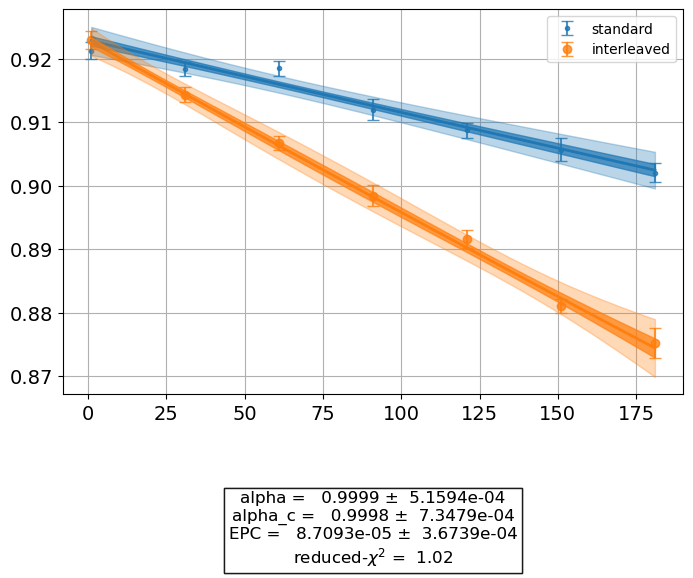

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 254
 - degree of freedom: 10
 - chi-square: 10.197140025640685
 - reduced chi-square: 1.0197140025640685
 - Akaike info crit.: 3.562699464015198
 - Bayesian info crit.: 6.118928782476232
 - init params:
  * a = 0.4223023060016304
  * alpha = 0.9997412868978875
  * b = 0.5
  * alpha_c = 0.9995931497002837
 - fit params:
  * a = 0.9229053749603773 ± 3.784214125920602
  * alpha = 0.9998761699331705 ± 0.0005159417018747365
  * b = 1.6510083664439977e-10 ± 3.7846225415111387
  * alpha_c = 0.9998258141711107 ± 0.0007347862816547133
 - correlations:
  * (a, b) = -0.9999999863117814
  * (b, alpha_c) = -0.999940408799501
  * (alpha, b) = -0.9998824185958366
  * (alpha, alpha_c) = 0.9997426203728366
  * (a, alpha) = 0.9

In [28]:
# View result data
display(exp_data.figure(0))
for result in int_results:
    print(result)

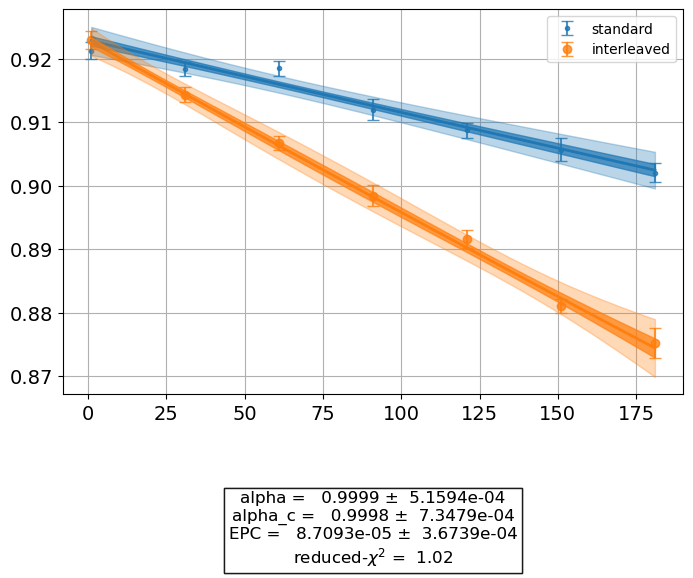

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 254
 - degree of freedom: 10
 - chi-square: 10.197140025640685
 - reduced chi-square: 1.0197140025640685
 - Akaike info crit.: 3.562699464015198
 - Bayesian info crit.: 6.118928782476232
 - init params:
  * a = 0.4223023060016304
  * alpha = 0.9997412868978875
  * b = 0.5
  * alpha_c = 0.9995931497002837
 - fit params:
  * a = 0.9229053749603773 ± 3.784214125920602
  * alpha = 0.9998761699331705 ± 0.0005159417018747365
  * b = 1.6510083664439977e-10 ± 3.7846225415111387
  * alpha_c = 0.9998258141711107 ± 0.0007347862816547133
 - correlations:
  * (a, b) = -0.9999999863117814
  * (b, alpha_c) = -0.999940408799501
  * (alpha, b) = -0.9998824185958366
  * (alpha, alpha_c) = 0.9997426203728366
  * (a, alpha) = 0.9

In [22]:
# View result data
display(int_expdata.figure(0))
for result in int_results:
    print(result)

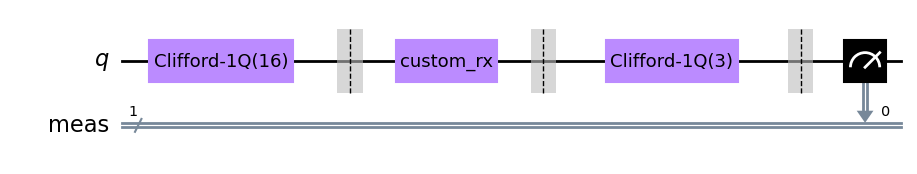

In [23]:
int_exp.circuits()[1].draw(output='mpl')

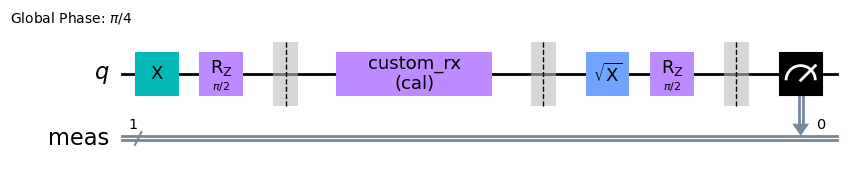

In [24]:
# you can see that the transpiled circuits contain the calibrations
int_exp._transpiled_circuits()[1].draw(output='mpl')